# FraudGuard ML

## Project Overview

Credit card fraud is a significant concern for financial institutions and customers, leading to financial losses and security risks.
Implementing a fraud detection model using machine learning can help financial institutions identify and prevent fraudulent transactions, improving security and reducing financial losses.
Project Goals:

Develop a machine learning model that can accurately detect fraudulent credit card transactions.
Build a Flask API to provide a user-friendly interface for uploading credit card transaction data and obtaining fraud predictions.
Enable financial institutions to integrate this model into their existing systems to enhance their fraud detection capabilities.
FinTech Relevance:

The project addresses a critical issue in the FinTech domain by leveraging machine learning to improve fraud detection in financial transactions.
Fraud detection is a key component of risk management in the financial sector, and accurate fraud detection models help maintain the integrity of financial systems.
Financial Programming:

The code includes data preprocessing, exploratory data analysis, model training, and evaluation steps.
Various machine learning algorithms, such as logistic regression and random forest, are employed to develop accurate fraud detection models.
The Flask API allows users to interact with the model, upload transaction data, and receive fraud predictions in real-time.
This project demonstrates the application of financial programming concepts by combining data analysis, model development, and API development to address a financial problem.
In summary, this project focuses on leveraging machine learning techniques and financial programming to build a credit card fraud detection system. By developing an accurate model and deploying it as a Flask API, the project contributes to FinTech by enhancing fraud detection capabilities in financial transactions.

## Step 1: Data Acquisition and Understanding

In [1]:
# Import Necessary libraries

# EPreprocessing/EDA
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp
from sklearn.utils import resample

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb

# Warnings
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# Show all columns in df
pd.set_option('display.max_columns', None)

# Read in the creditcard3.csv file into a Pandas DataFrame
transaction_fraud_data = pd.read_csv(
    Path('./Resources/creditcard3.csv')
)

# Review DataFrame
display(transaction_fraud_data.head())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
display(transaction_fraud_data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
179548,124130.0,2.121935,-0.086669,-1.784939,0.090006,0.539339,-0.475424,0.128739,-0.202454,0.730243,0.019054,-1.405627,-0.306372,-0.450110,0.567172,0.956116,-0.010714,-0.690025,0.193578,-0.021554,-0.237701,0.192019,0.657909,-0.038171,0.042918,0.343503,-0.093888,-0.026889,-0.060476,3.00,0
179549,124130.0,-0.707583,0.461017,0.201920,-0.415126,1.188319,-1.343084,0.831151,-0.155098,0.084754,-1.698336,-0.590678,0.075532,0.052195,-1.701796,-0.472662,-0.108402,1.173887,0.155329,0.001647,0.119624,-0.102741,-0.288033,-0.036139,-0.161109,-0.156463,-0.115615,0.120778,0.200976,34.66,0
179550,124130.0,2.042074,-0.058200,-1.163093,0.218613,0.133397,-0.689122,0.123630,-0.208071,0.195548,0.221557,0.793542,1.401782,0.749839,0.310693,-0.715442,0.150938,-0.695825,-0.357606,0.551220,-0.156820,-0.250253,-0.587064,0.279527,-0.316419,-0.261736,0.195879,-0.070334,-0.071789,1.98,0
179551,124131.0,1.833322,-0.080737,-2.246763,1.182158,0.828036,-0.857784,0.945280,-0.456499,-0.152713,0.305392,-1.056685,0.002773,-0.063479,0.818671,0.269740,-0.275468,-0.568001,-0.252336,-0.300043,0.034836,0.179119,0.276687,-0.138186,0.477808,0.480907,-0.516158,-0.064040,-0.035271,144.00,0
179552,124131.0,-0.995882,-0.125895,2.073996,-2.468202,-0.132599,-0.097336,-0.155471,0.154813,-1.018165,-0.277302,-0.637692,-0.232504,1.779877,-0.981806,0.370842,1.805488,-0.509586,-1.021168,-0.402395,0.498620,0.265116,0.589603,-0.187904,0.629754,0.546198,-0.255708,0.264398,0.139241,50.35,0


In [3]:
# Check DataFrame data information
display(transaction_fraud_data.info())

# Check for duplicates
print('Duplicates:')
display(transaction_fraud_data.duplicated().sum())

# Check for null values
print('Null Values:')
display(transaction_fraud_data.isnull().sum())

# Display the shape of the DataFrame
print('Shape:')
display(transaction_fraud_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179553 entries, 0 to 179552
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    179553 non-null  float64
 1   V1      179553 non-null  float64
 2   V2      179553 non-null  float64
 3   V3      179553 non-null  float64
 4   V4      179553 non-null  float64
 5   V5      179553 non-null  float64
 6   V6      179553 non-null  float64
 7   V7      179553 non-null  float64
 8   V8      179553 non-null  float64
 9   V9      179553 non-null  float64
 10  V10     179553 non-null  float64
 11  V11     179553 non-null  float64
 12  V12     179553 non-null  float64
 13  V13     179553 non-null  float64
 14  V14     179553 non-null  float64
 15  V15     179553 non-null  float64
 16  V16     179553 non-null  float64
 17  V17     179553 non-null  float64
 18  V18     179553 non-null  float64
 19  V19     179553 non-null  float64
 20  V20     179553 non-null  float64
 21  V21     17

None

Duplicates:


669

Null Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Shape:


(179553, 31)

## Step 2: Exploratory Data Analysis (EDA) and Preprocessing

In [4]:
# Drop duplicates from the DataFrame
transaction_fraud_data.drop_duplicates(inplace=True)

# Check for duplicates after dropping
print('Duplicates:')
display(transaction_fraud_data.duplicated().sum())

Duplicates:


0

In [5]:
# Drop the 'Time' column from the DataFrame
transaction_fraud_data = transaction_fraud_data.drop(columns=['Time'])

# Display the updated DataFrame
display(transaction_fraud_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179548,2.121935,-0.086669,-1.784939,0.090006,0.539339,-0.475424,0.128739,-0.202454,0.730243,0.019054,-1.405627,-0.306372,-0.450110,0.567172,0.956116,-0.010714,-0.690025,0.193578,-0.021554,-0.237701,0.192019,0.657909,-0.038171,0.042918,0.343503,-0.093888,-0.026889,-0.060476,3.00,0
179549,-0.707583,0.461017,0.201920,-0.415126,1.188319,-1.343084,0.831151,-0.155098,0.084754,-1.698336,-0.590678,0.075532,0.052195,-1.701796,-0.472662,-0.108402,1.173887,0.155329,0.001647,0.119624,-0.102741,-0.288033,-0.036139,-0.161109,-0.156463,-0.115615,0.120778,0.200976,34.66,0
179550,2.042074,-0.058200,-1.163093,0.218613,0.133397,-0.689122,0.123630,-0.208071,0.195548,0.221557,0.793542,1.401782,0.749839,0.310693,-0.715442,0.150938,-0.695825,-0.357606,0.551220,-0.156820,-0.250253,-0.587064,0.279527,-0.316419,-0.261736,0.195879,-0.070334,-0.071789,1.98,0
179551,1.833322,-0.080737,-2.246763,1.182158,0.828036,-0.857784,0.945280,-0.456499,-0.152713,0.305392,-1.056685,0.002773,-0.063479,0.818671,0.269740,-0.275468,-0.568001,-0.252336,-0.300043,0.034836,0.179119,0.276687,-0.138186,0.477808,0.480907,-0.516158,-0.064040,-0.035271,144.00,0


In [6]:
# Calculate the number of non-fraudulent transactions
non_fraud = len(transaction_fraud_data[transaction_fraud_data.Class == 0])

# Calculate the number of fraudulent transactions
fraud = len(transaction_fraud_data[transaction_fraud_data.Class == 1])

# Calculate the percentage of fraudulent transactions
fraud_percent = (fraud / (fraud + non_fraud)) * 100

# Print the results
print(f"The number of non-fraudulent transactions is {non_fraud}, fraudulent is {fraud}.")

The number of non-fraudulent transactions is 178538, fraudulent is 346.


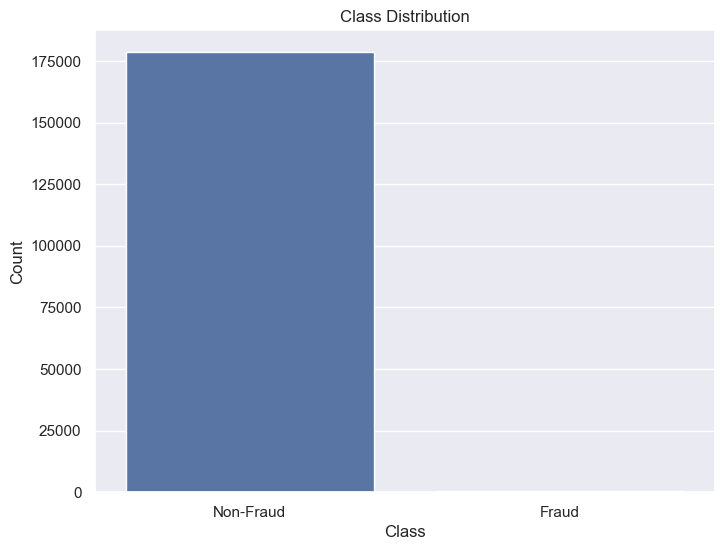

In [7]:
# Define the labels for the two classes
labels = ["Non-Fraud", "Fraud"]

# Count the occurrences of each class in the "Class" column
count_classes = transaction_fraud_data['Class'].value_counts()

# Calculate the percentages of each class
percentages = count_classes / len(transaction_fraud_data) * 100

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.barplot(x=labels, y=count_classes)

# Set the title and labels
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

# Display the plot
plt.show()

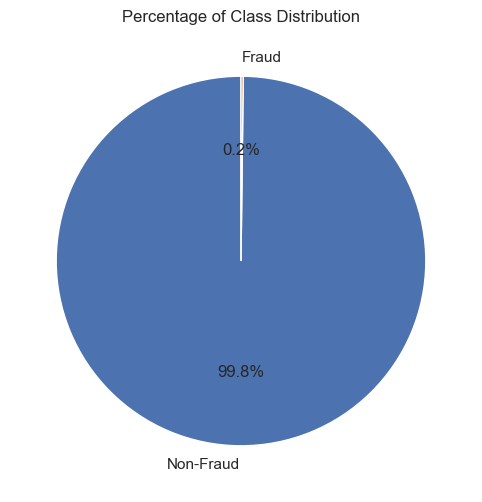

In [8]:
# Define the labels for the two classes
labels = ["Non-Fraud", "Fraud"]

# Count the occurrences of each class in the "Class" column
count_classes = transaction_fraud_data['Class'].value_counts()

# Calculate the percentages of each class
percentages = count_classes / len(transaction_fraud_data) * 100

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title("Percentage of Class Distribution")

# Display the plot
plt.show()

In [9]:
# Describe the dataset
transaction_fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,178884.0,-0.140672,1.855518,-56.407510,-0.973979,-0.144921,1.194156,2.439207
V2,178884.0,0.021988,1.606229,-72.715728,-0.557886,0.095984,0.790573,22.057729
V3,178884.0,0.437703,1.397416,-33.680984,-0.146625,0.584700,1.274376,9.382558
V4,178884.0,0.098394,1.379819,-5.519697,-0.766191,0.102720,0.917499,16.875344
V5,178884.0,-0.154644,1.347526,-42.147898,-0.813154,-0.208707,0.404307,34.801666
V6,178884.0,0.053845,1.302016,-26.160506,-0.697655,-0.208777,0.445097,22.529298
V7,178884.0,-0.070001,1.198670,-43.557242,-0.582614,-0.025449,0.473927,36.677268
V8,178884.0,0.027467,1.204315,-73.216718,-0.168669,0.051310,0.344605,20.007208
V9,178884.0,0.013380,1.142029,-13.434066,-0.662295,-0.078879,0.634312,15.594995
V10,178884.0,-0.023764,1.077783,-24.588262,-0.518250,-0.107209,0.422027,23.745136


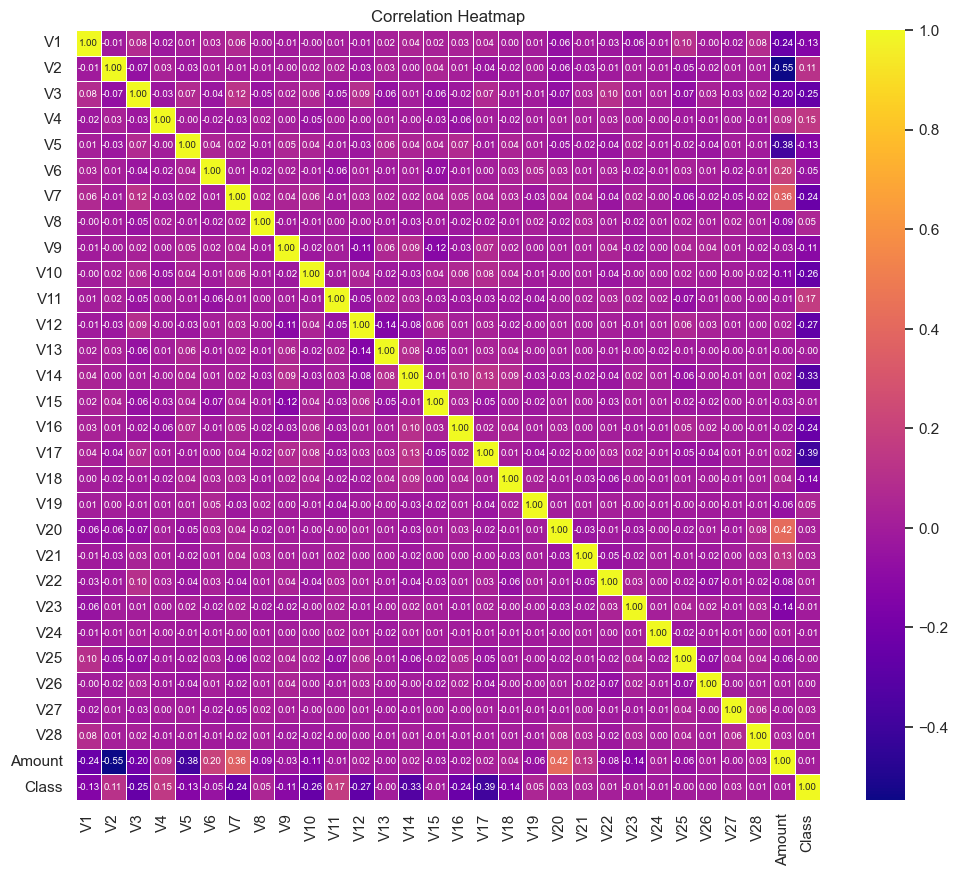

In [10]:
# Create a correlation matrix
correlation_matrix = transaction_fraud_data.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5, ax=ax, annot_kws={"fontsize": 7})

# Set the title of the heatmap
ax.set_title('Correlation Heatmap')

# Display the heatmap
plt.show()

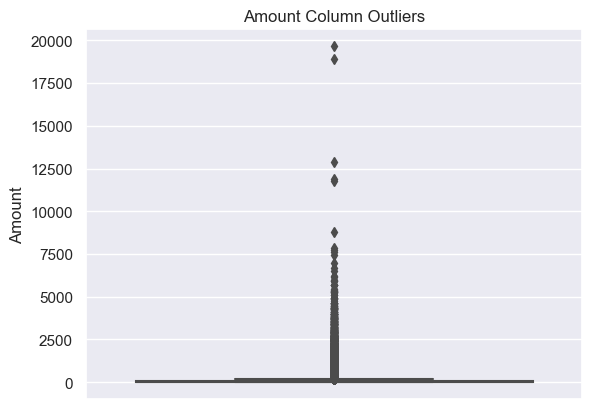

In [11]:
# Set the Seaborn style
sns.set(style='darkgrid')

# Create a boxplot of the 'Amount' column to visualize outliers
sns.boxplot(data=transaction_fraud_data, y='Amount')

# Set the title of the plot
plt.title('Amount Column Outliers')

# Display the plot
plt.show()

In [12]:
# Remove outliers from the 'Amount' column
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from the 'Amount' column of the transaction_fraud_data DataFrame
transaction_fraud_data = remove_outliers(transaction_fraud_data, 'Amount')

# Describe dataset
transaction_fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,159131.0,-0.049432,1.746868,-36.510583,-0.910625,-0.106475,1.213740,2.439207
V2,159131.0,0.247647,1.261689,-40.938048,-0.361211,0.191941,0.870890,22.057729
V3,159131.0,0.485877,1.379218,-33.680984,-0.087064,0.622147,1.303560,4.226108
V4,159131.0,0.084100,1.360571,-5.519697,-0.764804,0.098443,0.900381,12.114672
V5,159131.0,-0.033715,1.197047,-23.669726,-0.678841,-0.133806,0.458686,34.099309
V6,159131.0,-0.005709,1.242362,-23.496714,-0.723495,-0.253669,0.355199,8.933762
V7,159131.0,-0.147351,1.032599,-43.557242,-0.603378,-0.046101,0.419887,6.192463
V8,159131.0,0.050946,1.155579,-41.484823,-0.157183,0.057199,0.352283,20.007208
V9,159131.0,0.017064,1.128140,-13.434066,-0.641577,-0.077257,0.614317,10.392889
V10,159131.0,0.005523,1.072721,-24.588262,-0.490356,-0.096330,0.428651,15.331742


In [13]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the 'Amount' column data
transaction_fraud_data['Amount'] = scaler.fit_transform(transaction_fraud_data[['Amount']])

# Display the standardized 'Amount' column
display(transaction_fraud_data['Amount'])

0         2.679458
1        -0.767942
3         2.066608
4         0.811109
5        -0.744948
            ...   
179548   -0.760668
179549   -0.017834
179550   -0.784600
179551    2.547596
179552    0.350299
Name: Amount, Length: 159131, dtype: float64

## Step 3: Feature Selection and Engineering

In [14]:
# Split the data into x and y variables
y = transaction_fraud_data['Class']
X = transaction_fraud_data.drop(columns=['Class'], axis=1)

# Display the 'y' variable
display(y)

# Display the 'X' variable
display(X)

0         0
1         0
3         0
4         0
5         0
         ..
179548    0
179549    0
179550    0
179551    0
179552    0
Name: Class, Length: 159131, dtype: int64

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.679458
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.767942
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.066608
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.811109
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.744948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179548,2.121935,-0.086669,-1.784939,0.090006,0.539339,-0.475424,0.128739,-0.202454,0.730243,0.019054,-1.405627,-0.306372,-0.450110,0.567172,0.956116,-0.010714,-0.690025,0.193578,-0.021554,-0.237701,0.192019,0.657909,-0.038171,0.042918,0.343503,-0.093888,-0.026889,-0.060476,-0.760668
179549,-0.707583,0.461017,0.201920,-0.415126,1.188319,-1.343084,0.831151,-0.155098,0.084754,-1.698336,-0.590678,0.075532,0.052195,-1.701796,-0.472662,-0.108402,1.173887,0.155329,0.001647,0.119624,-0.102741,-0.288033,-0.036139,-0.161109,-0.156463,-0.115615,0.120778,0.200976,-0.017834
179550,2.042074,-0.058200,-1.163093,0.218613,0.133397,-0.689122,0.123630,-0.208071,0.195548,0.221557,0.793542,1.401782,0.749839,0.310693,-0.715442,0.150938,-0.695825,-0.357606,0.551220,-0.156820,-0.250253,-0.587064,0.279527,-0.316419,-0.261736,0.195879,-0.070334,-0.071789,-0.784600
179551,1.833322,-0.080737,-2.246763,1.182158,0.828036,-0.857784,0.945280,-0.456499,-0.152713,0.305392,-1.056685,0.002773,-0.063479,0.818671,0.269740,-0.275468,-0.568001,-0.252336,-0.300043,0.034836,0.179119,0.276687,-0.138186,0.477808,0.480907,-0.516158,-0.064040,-0.035271,2.547596


In [15]:
# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (127304, 29)
X_test shape: (31827, 29)
y_train shape: (127304,)
y_test shape: (31827,)


In [16]:
# Print the class distribution of the training set
print("Train set class distribution:")
print(y_train.value_counts())

# Print the class distribution of the test set
print("Test set class distribution:")
print(y_test.value_counts())

Train set class distribution:
0    127060
1       244
Name: Class, dtype: int64
Test set class distribution:
0    31784
1       43
Name: Class, dtype: int64


## Step 4: Model Building and Evaluation: Logistic Regression

In [17]:
# Create an instance of Logistic Regression model
log_reg = LogisticRegression(random_state=10, verbose=1)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.82404D+04    |proj g|=  6.34080D+04


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  5.20874D+02    |proj g|=  7.56765D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   30     89     99      1     0     0   4.300D-02   5.208D+02
  F =   520.84773835772978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(random_state=10, verbose=1)

In [18]:
# Make predictions on the training data
lr_predictions = log_reg.predict(X_train)

In [19]:
# Print the confusion matrix for the training predictions
training_matrix = confusion_matrix(y_train, lr_predictions)
print(training_matrix)

[[127026     34]
 [    98    146]]


In [20]:
# Calculate the accuracy of the logistic regression model on the training dataset
accuracy = accuracy_score(y_train, lr_predictions)
print(accuracy)

0.9989631119210708


In [21]:
# Save the classification report for the training predictions
training_report = classification_report(y_train, lr_predictions)

# Print the classification report
print(training_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127060
           1       0.81      0.60      0.69       244

    accuracy                           1.00    127304
   macro avg       0.91      0.80      0.84    127304
weighted avg       1.00      1.00      1.00    127304



In [22]:
# Make predictions on the testing data
lr_predictions2 = log_reg.predict(X_test)

In [23]:
# Print the confusion matrix for the testing predictions
testing_matrix = confusion_matrix(y_test, lr_predictions2)
print(testing_matrix)

[[31774    10]
 [   16    27]]


In [24]:
# Calculate the accuracy of the logistic regression model on the test dataset
accuracy = accuracy_score(y_test, lr_predictions2)
print(accuracy)

0.9991830835454174


In [25]:
# Save the classification report for the testing predictions
testing_report = classification_report(y_test, lr_predictions2)

# Print the classification report
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31784
           1       0.73      0.63      0.68        43

    accuracy                           1.00     31827
   macro avg       0.86      0.81      0.84     31827
weighted avg       1.00      1.00      1.00     31827



## Step 5: Model Building and Evaluation: Random Forest Classifier

In [26]:
# Create an instance of Random Forest Classifier
ran_for = RandomForestClassifier(random_state=42, verbose=2)

# Fit the model on the training data
ran_for.fit(X_train, y_train)

building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.1s finished


RandomForestClassifier(random_state=42, verbose=2)

In [27]:
# Make predictions on the training data
ft_predictions = ran_for.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [28]:
# Print the confusion matrix for the training predictions
training_matrix = confusion_matrix(y_train, ft_predictions)
print(training_matrix)

[[127060      0]
 [     1    243]]


In [29]:
# Calculate the accuracy of the random forest classifier model on the training dataset
accuracy = accuracy_score(y_train, ft_predictions)
print(accuracy)

0.9999921447872808


In [30]:
# Save the classification report for the training predictions
training_report = classification_report(y_train, ft_predictions)

# Print the classification report
print(training_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127060
           1       1.00      1.00      1.00       244

    accuracy                           1.00    127304
   macro avg       1.00      1.00      1.00    127304
weighted avg       1.00      1.00      1.00    127304



In [31]:
# Make predictions on the testing data
ft_predictions2 = ran_for.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [32]:
# Print the confusion matrix for the testing predictions
testing_matrix = confusion_matrix(y_test, ft_predictions2)
print(testing_matrix)

[[31781     3]
 [    7    36]]


In [33]:
# Calculate the accuracy of the random forest classifier model on the test dataset
accuracy = accuracy_score(y_test, ft_predictions2)
print(accuracy)

0.9996858013636221


In [34]:
# Save the classification report for the testing predictions
testing_report = classification_report(y_test, ft_predictions2)

# Print the classification report
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31784
           1       0.92      0.84      0.88        43

    accuracy                           1.00     31827
   macro avg       0.96      0.92      0.94     31827
weighted avg       1.00      1.00      1.00     31827



## Step 6: Model Building and Evaluation: Support Vector Machine Classifier

In [35]:
# Create an instance of Support Vector Machine Classifier
svm_clf = SVC(random_state=42, verbose=2)

# Fit the model on the training data
svm_clf.fit(X_train, y_train)

[LibSVM]..*.*
optimization finished, #iter = 3706
obj = -198.891826, rho = -0.717263
nSV = 1633, nBSV = 126
Total nSV = 1633


SVC(random_state=42, verbose=2)

In [36]:
# Make predictions on the training data
svc_predictions = svm_clf.predict(X_train)

In [37]:
# Print the confusion matrix for the training predictions
training_matrix = confusion_matrix(y_train, svc_predictions)
print(training_matrix)

[[127055      5]
 [    32    212]]


In [38]:
# Calculate the accuracy of the SVM classifier model on the training dataset
accuracy = accuracy_score(y_train, svc_predictions)
print(accuracy)

0.999709357129391


In [39]:
# Save the classification report for the training predictions
training_report = classification_report(y_train, svc_predictions)

# Print the classification report
print(training_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127060
           1       0.98      0.87      0.92       244

    accuracy                           1.00    127304
   macro avg       0.99      0.93      0.96    127304
weighted avg       1.00      1.00      1.00    127304



In [40]:
# Make predictions on the testing data
svc_predictions2 = svm_clf.predict(X_test)

In [41]:
# Print the confusion matrix for the testing predictions
testing_matrix = confusion_matrix(y_test, svc_predictions2)
print(testing_matrix)

[[31780     4]
 [   19    24]]


In [42]:
# Calculate the accuracy of the SVM classifier model on the test dataset
accuracy = accuracy_score(y_test, svc_predictions2)
print(accuracy)

0.9992773431363308


In [43]:
# Save the classification report for the testing predictions
testing_report = classification_report(y_test, svc_predictions2)

# Print the classification report
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31784
           1       0.86      0.56      0.68        43

    accuracy                           1.00     31827
   macro avg       0.93      0.78      0.84     31827
weighted avg       1.00      1.00      1.00     31827



## Step 7: Model Building and Evaluation: XGBoost Classifier

In [44]:
# Create an instance of XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)



In [45]:
# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the training data
xgb_predictions = xgb_clf.predict(X_train)

# Print the confusion matrix for the training predictions
training_matrix = confusion_matrix(y_train, xgb_predictions)
print(training_matrix)

# Calculate the accuracy of the XGBoost classifier model on the training dataset
accuracy = accuracy_score(y_train, xgb_predictions)
print(accuracy)

# Save the classification report for the training predictions
training_report = classification_report(y_train, xgb_predictions)
print(training_report)

[[127060      0]
 [     0    244]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127060
           1       1.00      1.00      1.00       244

    accuracy                           1.00    127304
   macro avg       1.00      1.00      1.00    127304
weighted avg       1.00      1.00      1.00    127304



In [46]:
# Make predictions on the testing data
xgb_predictions2 = xgb_clf.predict(X_test)

# Print the confusion matrix for the testing predictions
testing_matrix = confusion_matrix(y_test, xgb_predictions2)
print(testing_matrix)

# Calculate the accuracy of the XGBoost classifier model on the test dataset
accuracy = accuracy_score(y_test, xgb_predictions2)
print(accuracy)

# Save the classification report for the testing predictions
testing_report = classification_report(y_test, xgb_predictions2)
print(testing_report)

[[31778     6]
 [    8    35]]
0.999560121909071
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31784
           1       0.85      0.81      0.83        43

    accuracy                           1.00     31827
   macro avg       0.93      0.91      0.92     31827
weighted avg       1.00      1.00      1.00     31827



## Step 8: Model Building and Evaluation: KS Test

In [47]:
# Separate the fraud and non-fraud data
fraud_data = transaction_fraud_data[transaction_fraud_data['Class'] == 1]
non_fraud_data = transaction_fraud_data[transaction_fraud_data['Class'] == 0]

In [48]:
# Perform KS test on a chosen feature (e.g., 'Amount') between fraud and non-fraud data
ks_statistic, p_value = ks_2samp(fraud_data['Amount'], non_fraud_data['Amount'])

In [49]:
# Print KS statistic and p-value
print("KS Statistic:", ks_statistic)
print("p-value:", p_value)

KS Statistic: 0.32856289127974003
p-value: 5.296912427603326e-28


## Step 7: Select Best Performing Model

The random forest classifier is the best performing model among the three models and continues to show good performance on the test data, it reinforces the suitability of the random forest classifier for the web app. With high accuracy on both the train and test data, the model demonstrates robustness and generalization capabilities.

Considering its strong performance, you can confidently select the random forest classifier as the final model for your web app. However, it's essential to continue monitoring its performance and assess its behavior in a real-world production environment. This ongoing evaluation will help ensure that the model maintains its high performance and remains suitable for deployment in the web app.

## FLASK API

In [50]:
# Save the models to disk
joblib.dump(log_reg, 'log_reg_model.pkl')
joblib.dump(ran_for, 'ran_for_model.pkl')
joblib.dump(svm_clf, 'svm_clf_model.pkl')

['svm_clf_model.pkl']